In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import Image

# Gravitational Orbits

In [3]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/0/0e/NewtonsLawOfUniversalGravitation.svg')

To solve the differential equations for orbits, we have defined the $\mathbf{z}$ 
and $d\mathbf{z}/dt$ vectors as

$\begin{align}
  \mathbf{z} = \left(\begin{array}{c} x_1(t) \\ \dot x_1(t) \\
  y_1(t) \\ \dot y_1(t) \\
  x_2(t) \\ \dot x_2(t) \\
  y_2(t) \\ \dot y_2(t))  \end{array} \right) 
  \qquad
  \frac{d\mathbf{z}}{dt} 
       = \left(\begin{array}{c} \dot{x_1(t)} \\ \ddot{x_1(t)} \\
       \dot{y_1(t)} \\ \ddot{y_1(t)} \\
       \dot{x_2(t)} \\ \ddot{x_2(t)} \\
       \dot{y_2(t)} \\ \ddot{y_2(t)} \\\end{array} \right) 
       = \left(\begin{array}{c} \dot{x_1(t)} \\ 
        -\frac{G m_2}{|r|^3}(x_1-x_2)\\ \dot{y_1(t)} \\
       -\frac{G m_2}{|r|^3}(y_1-y_2) \\ \dot{x_2(t)} \\ 
        \frac{G m_1}{|r|^3}(x_1-x_2) \\ \dot{y_2(t)} \\ 
        \frac{G m_1}{|r|^3}(y_1-y_2) \end{array} \right) 
\end{align}$


### Class and setup

In [4]:
class GravitationalOrbits():
    """
This class implements parameters and equations for 
masses orbiting under gravitational attraction

Parameters
    ----------
    m1 : float
        mass
    m2 : float
        mass
    G : float


    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y
    """
    
    def __init__(self, m1=1., m2=1., G = 1.):
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
        

    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2 dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with z[0] = x1(t), z[1] = dx1/dt, 
                                    z[2] = y1(t), z[3] = dy1/dt, 
                                    z[4] = x2(t), z[5] = dx2/dt,
                                    z[6] = y2(t), z[7] = dy2/dt
        """
        r_12 = np.sqrt( (z[0] - z[4])**2 + (z[2] - z[6])**2 )
        return [ z[1], (self.G * self.m2 * (z[4] - z[0]) / (r_12**3)),
                 z[3], (self.G * self.m2 * (z[6] - z[2]) / (r_12**3)),
                 z[5],  (-self.G * self.m1 * (z[4] - z[0]) / (r_12**3)),
                 z[7],  (-self.G * self.m1 * (z[6] - z[2]) / (r_12**3))]
    
    
  


    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """

        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), \
                             z_0 , t_eval=t_pts,  method='RK23',\
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    

    


In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

### Making Orbit Plots

In [7]:
#axes labels
orbit_labels = (r'$x$', r'$y$')

#plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

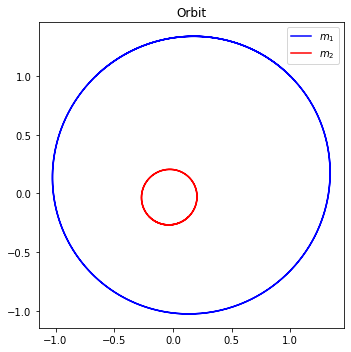

In [8]:
#plotting time
t_start = 0.
t_end = 20.
delta_t = 0.01

m1 = 1.
m2 = 5
G = 1.

#initiate orbits
o1 = GravitationalOrbits(m1, m2, G=G)

# Initial conditions
x1_0 = 1.
x1_dot_0 = -1.
y1_0 = 1.
y1_dot_0 = 1.


x2_0 = -(m1 / m2) * x1_0
x2_dot_0 = -(m1 / m2) * x1_dot_0
y2_0 = -(m1 / m2) * y1_0
y2_dot_0 = -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, \
       x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = \
            o1.solve_ode(t_pts, z_0)

#start the plot
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')
ax.set_title('Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('orbit.png' , bbox_inches='tight')



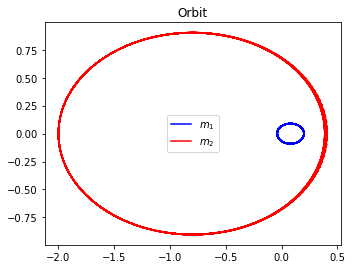

In [9]:
#plotting time
t_start = 0.
t_end = 20.
delta_t = 0.01

m1 = 20.
m2 = 2.
G = 20.

#initiate orbits
o1 = GravitationalOrbits(m1, m2, G=G)

# Initial conditions
x1_0 = 0.2
x1_dot_0 = 0.
y1_0 = 0.
y1_dot_0 = 0.75


x2_0 = -(m1 / m2) * x1_0
x2_dot_0 = -(m1 / m2) * x1_dot_0
y2_0 = -(m1 / m2) * y1_0
y2_dot_0 = -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, \
       x2_0, x2_dot_0, y2_0, y2_dot_0]
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = \
            o1.solve_ode(t_pts, z_0)

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color='blue', label=r'$m_1$')
ax.plot(x2, y2, color='red', label=r'$m_2$')
ax.set_title('Orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('orbit2.png' , bbox_inches='tight')

In this second case we can see a heavier mass and a smaller orbit for mass 1. If the orbit for mass 1 where to go to its smaller limit it would be effectively a rest frame of reference. With the smaller orbit and heavier mass 1 the problem reduces to the orbits considered in class.